# LAB 1

In [77]:
from importlib import reload
import numpy as np
import maze as mz
reload(mz)

<module 'maze' from 'C:\\GIT\\KTH-ReinforcementLearning\\LAB1\\EX1\\maze.py'>

### Point A: Dynamic programming

In [65]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

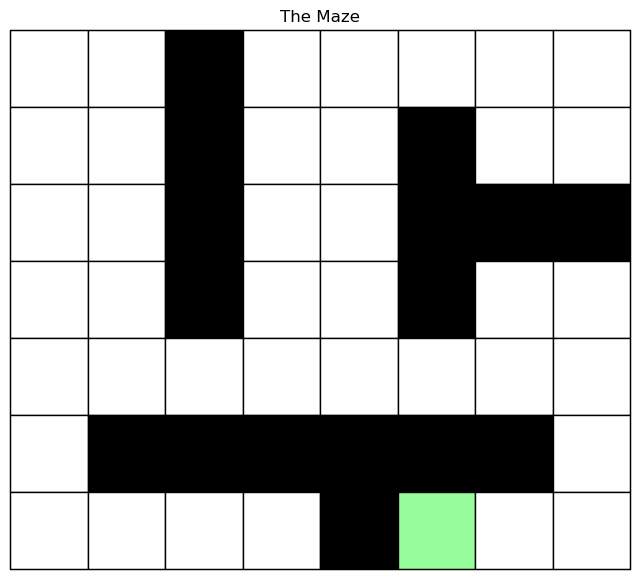

In [66]:
mz.draw_maze(maze)

In [125]:
# Create an environment maze
reload(mz)
env = mz.Maze(maze)

In [126]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

In [128]:
# Simulate the shortest path starting from position A
method = 'DynProg'
start  = ((0,0),(6,5))
death_count = 0
win_count = 0
other_count = 0
mean_time = 0
iter = 10000
for i in range(iter):
    path = env.simulate(start, policy, method)
    for t in range(len(path)):
        if path[t][0] == path[t][1]:
            death_count += 1
            break
        elif path[t][0] == (6,5):
            win_count += 1
            mean_time += t
            break
        elif t == len(path)-1:
            other_count += 1
            break

mean_time = mean_time/win_count
print("Death perc: " + str(death_count*(100/iter)) + "%")
print("Win perc: " + str(win_count*(100/iter)) + "%")
print("Other perc: " + str(other_count*(100/iter)) + "%")
print("Mean time: " + str(mean_time) + " steps")

TypeError: unhashable type: 'numpy.ndarray'

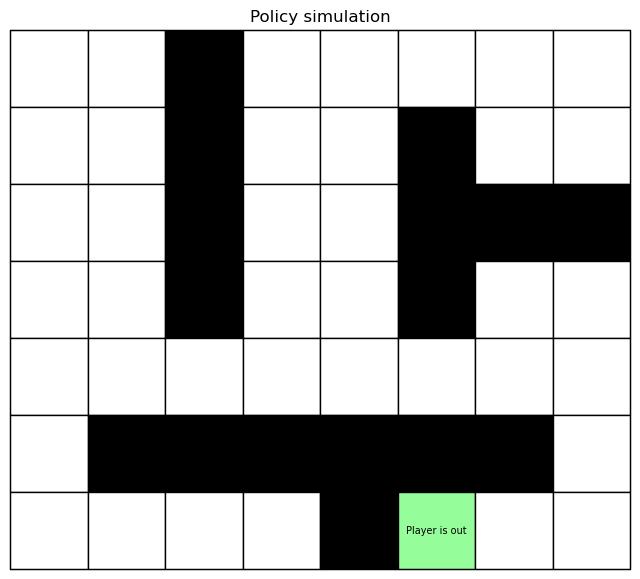

In [70]:
# Show the shortest path 
mz.animate_solution(maze, path)

### Point B: Value Iteration

In [122]:
# Create an environment maze
reload(mz)
env = mz.Maze(maze)

In [123]:
# Discount Factor 
p = 1/30
# Accuracy threshold
epsilon = 0.001
V, policy = mz.value_iteration(env, p, epsilon)

[ 866.77817959  915.77817959  915.77817959 ... 1770.64656133 1772.263228
 1753.97989467]
[2 4 4 ... 1 1 1]


In [124]:
# Simulate the shortest path starting from position A
method = 'ValIter'
start  = ((0,0),(6,5))
death_count = 0
win_count = 0
other_count = 0
mean_time = 0
iter = 10000
for i in range(iter):
    path = env.simulate(start, policy, method)
    #print(path)
    for t in range(len(path)):
        if path[t][0] == path[t][1]:
            death_count += 1
            break
        elif path[t][0] == (6,5):
            win_count += 1
            mean_time += t
            break
        elif t == len(path)-1:
            other_count += 1
            break

# mean_time = mean_time/win_count
print("Death perc: " + str(death_count*(100/iter)) + "%")
print("Win perc: " + str(win_count*(100/iter)) + "%")
print("Other perc: " + str(other_count*(100/iter)) + "%")
# print("Mean time: " + str(mean_time) + " steps")

3
4
14
47
37
35
109
155
13
13
5
137
23
8
4
8
4
25
46
4
60
14
2
13
6
3
32
118
50
22
27
13
3
10
33
69
21
21
37
69
12
20
39
11
21
3
61
1
43
94
31
8
16
1
6
19
28
94
33
3
59
46
77
44
9
13
26
35
69
100
15
6
3
31
12
40
44
19
92
9
18
37
74
17
26
19
16
20
38
6
33
15
223
82
34
51
13
13
29
14
67
64
2
28
1
112
86
31
126
2
108
21
13
17
28
8
46
5
17
10
37
12
146
25
3
29
37
30
14
92
56
79
82
46
5
9
24
83
33
8
18
22
9
16
35
30
9
37
49
9
36
8
27
21
48
6
3
14
15
17
45
6
59
11
28
20
60
54
70
10
13
12
48
4
51
10
31
29
3
40
5
39
4
1
29
29
11
82
52
34
8
12
11
15
37
20
101
35
28
22
86
53
30
80
6
10
46
31
2
29
51
33
27
36
19
55
26
31
5
12
26
31
27
53
14
27
69
61
22
35
87
5
3
3
45
40
2
61
40
9
56
30
37
81
36
3
10
21
4
24
47
39
32
6
23
38
23
13
98
25
81
16
16
47
3
71
54
84
7
41
15
83
8
2
3
105
79
1
5
15
5
26
15
8
17
26
13
36
11
16
32
1
5
27
11
13
38
2
3
15
5
75
43
7
15
10
15
11
18
16
64
2
82
57
12
59
36
105
7
18
3
10
24
3
11
23
27
14
1
12
4
7
51
95
16
78
16
91
92
20
69
89
80
3
7
7
10
38
12
18
14
29
64
90
8
40
9

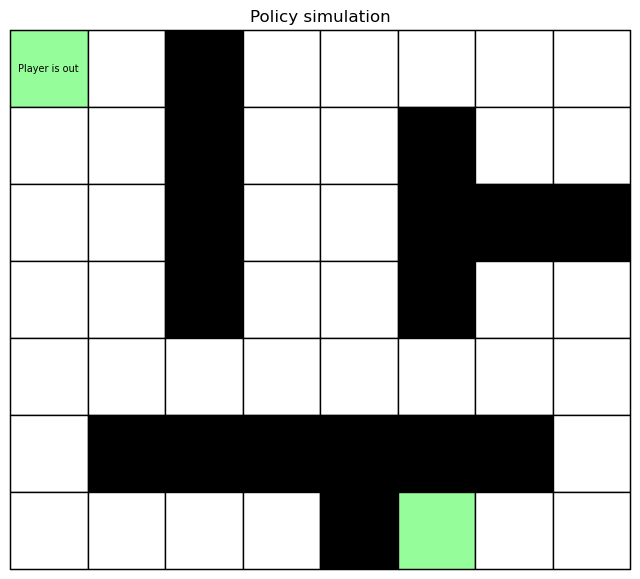

In [107]:
# Show the shortest path 
mz.animate_solution(maze, path)